<a href="https://colab.research.google.com/github/srujandeshpande/breast-cancer-prediction/blob/main/Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Analytics Project  


Team: **DataDemystifiers**  
Team Members:
<table>
<tr><th>Name</th><th>SRN</th></tr>
<tr><td>Vaibhav Gupta</td><td>PES2201800093</td></tr>
<tr><td>Srujan Vasudevrao Deshpande</td><td>PES2201800105</td></tr>
<tr><td>Aditya M Shetty</td><td>PES2201800169</td></tr>
<tr><td>Safa Hurayn</td><td>PES2201800392</td></tr>
</table>


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
!pip install sklearn-genetic
from genetic_selection import GeneticSelectionCV
!pip install genetic 
!pip install geneticalgorithm
from geneticalgorithm import geneticalgorithm as ga


     |████████████████████████████████| 163kB 6.1MB/s 
  Created wheel for genetic: filename=genetic-0.1.dev3-cp36-none-any.whl size=8680 sha256=d7d0a3c7ca0d8b568149c6ff20c800fba1fcbbdff9fa561f425655ed9c6986a0
  Stored in directory: /root/.cache/pip/wheels/0b/d9/57/8a082b569653c5e9c81ec54c5f3daef3a595a7ddab677bf391
Successfully built genetic
     |████████████████████████████████| 51kB 2.6MB/s 
  Created wheel for func-timeout: filename=func_timeout-4.3.5-cp36-none-any.whl size=15078 sha256=497ccc625484842c4dda1027df2e48a28148f61a76838bee7574b220a39590a3
  Stored in directory: /root/.cache/pip/wheels/46/7c/4f/24f1d2d5bbff92219debe7ea19af84f76ddeb90dd4ec544f26
Successfully built func-timeout


In [3]:
# Read the dataset
data = pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Removing the id and blank column
X = data.iloc[:, 2:-1]

# Taking all rows except header
Y = data.iloc[:, 1]

In [5]:
# The column diagnosis contains categorical data for the type of cancer. 
# The values can be either 'M' (Malignant) or 'B' (Benign)
# We are assigning a value of 1 if M and 0 if B

Y = [1 if i=='M' else 0 for i in Y]

In [14]:
# Taking a 70-30 split for the train and test data respectively

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [15]:
# Conducting Min-max normalization on the train dataset

# Find the minimum value in train dataset
min_train = X_train.min()

# Find biggest difference between min value and any point of dataset
range_train = (X_train-min_train).max()

# Normalise the data using min value and range
X_train= (X_train - min_train)/range_train

In [16]:
# Conducting Min-max normalization on the test dataset

# Find the minimum value in test dataset
min_test = X_test.min()

# Find biggest difference between min value and any point of dataset
range_test = (X_test-min_test).max()

# Normalise the data using min value and range
X_test= (X_test - min_test)/range_test

In [17]:
print(X_train.shape)
print(X_test.shape)
len(y_train)

(398, 30)
(171, 30)


398

In [18]:
# Using a Support Vector Classifier

classifier = SVC()
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
# Predicting the values

y_predict = classifier.predict(X_test)
y_predict

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

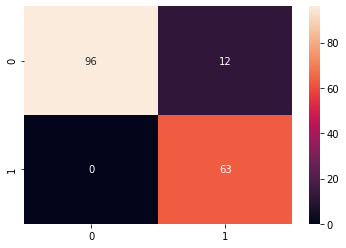

In [20]:
# Generating a confusion matrix of the predicted values
cm = confusion_matrix(y_test, y_predict)

# Plotting the confusion matrix
sns.heatmap(cm, annot= True)

In [21]:
# Accuracy of the original classifier

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       108
           1       0.84      1.00      0.91        63

    accuracy                           0.93       171
   macro avg       0.92      0.94      0.93       171
weighted avg       0.94      0.93      0.93       171



In [22]:
# Using a Genetic Algorithm to optimize the hyperparameters for the SVM Classifier

selector = GeneticSelectionCV(SVC(),
                                  cv=5,
                                  verbose=1,
                                  scoring="accuracy",
                                  max_features=10,
                                  n_population=50,
                                  crossover_proba=0.5,
                                  mutation_proba=0.2,
                                  n_generations=40,
                                  crossover_independent_proba=0.5,
                                  mutation_independent_proba=0.05,
                                  tournament_size=3,
                                  n_gen_no_change=10,
                                  caching=True,
                                  n_jobs=1)

In [23]:
# Training the dataset using the Genetic Algorithm optimized SVM Classifier

selector.fit(X_train, y_train)

Selecting features with genetic algorithm.
gen	nevals	avg                    	std                    	min                    	max                      
0  	50    	[0.90306076 4.64      ]	[0.06295227 2.63636113]	[0.71870253 1.        ]	[ 0.96990506 10.        ]
1  	31    	[-199.07442278    6.58      ]	[1400.13222557    2.33315237]	[-1.e+04  2.e+00]      	[ 0.97243671 12.        ]
2  	33    	[-199.06165063    7.78      ]	[1400.13405003    1.90042101]	[-1.e+04  4.e+00]      	[ 0.97496835 12.        ]
3  	34    	[-399.07284873    8.48      ]	[1.95978105e+03 1.72325274e+00]	[-1.e+04  4.e+00]      	[ 0.97496835 11.        ]
4  	31    	[-1799.20647722     9.34      ]	[3.84224632e+03 1.55704849e+00]	[-1.e+04  5.e+00]      	[ 0.97496835 13.        ]
5  	29    	[-1799.20541266     9.14      ]	[3.84224682e+03 1.64936351e+00]	[-1.e+04  6.e+00]      	[ 0.98 13.  ]            
6  	28    	[-1199.14575823     9.16      ]	[3.24993081e+03 1.39082709e+00]	[-1.e+04  6.e+00]      	[ 0.98 13.  ]            

GeneticSelectionCV(caching=True, crossover_independent_proba=0.5,
                   crossover_proba=0.5, cv=5,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   fit_params=None, max_features=10,
                   mutation_independent_proba=0.05, mutation_proba=0.2,
                   n_gen_no_change=10, n_generations=40, n_jobs=1,
                   n_population=50, scoring='accuracy', tournament_size=3,
                   verbose=1)

In [24]:
# Predicting the values using the trained classifier

optimized_preds = selector.predict(X_test)

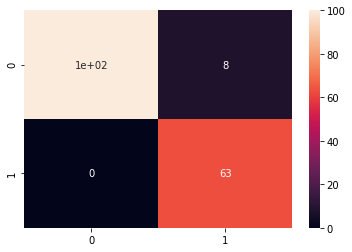

In [25]:
# Generating a confusion matrix of the predicted values from the optimized classifier
cm = confusion_matrix(y_test, optimized_preds)

# Plotting the confusion matrix
sns.heatmap(cm, annot= True)

In [26]:
print(classification_report(y_test, optimized_preds))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96       108
           1       0.89      1.00      0.94        63

    accuracy                           0.95       171
   macro avg       0.94      0.96      0.95       171
weighted avg       0.96      0.95      0.95       171

